In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('tumor.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


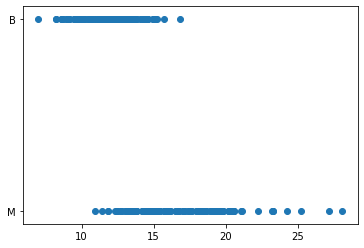

In [87]:
plt.scatter(df.radius_mean[:250], df.diagnosis[:250])

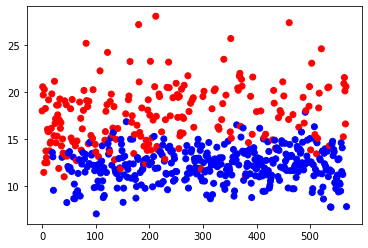

In [6]:
fig, ax = plt.subplots()

colors = {'M':'red', 'B':'blue'}

ax.scatter(df.index, df.radius_mean, c=df.diagnosis.apply(lambda x: colors[x]))

plt.show()

In [88]:
x = np.array(df.radius_mean)

In [89]:
y = np.array([0 if el == 'B' else 1 for el in df.diagnosis])

In [90]:
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [91]:
train_slice = int(np.round(df.shape[0]*.7))
train_set_y = y[:train_slice]
test_set_y = y[train_slice: ]
train_set_x = x[:train_slice]
test_set_x = x[train_slice: ]
print(len(test_set_y), len(test_set_x))

171 171


In [99]:

iteration = 10000
learning_rate = 0.0001  
yPredict = []
cost = []
def gredient_descent(x,y,iteration,learning_rate):
    m0 = 0
    m1 = 0
    for _ in range(iteration):
        lin_model = m0 + m1*x
        ySigmoid = 1 / (1 + np.exp(-lin_model))
        yPredict = [0 if el<0.5 else 1 for el in ySigmoid]
        cost.append( (1/len(x))*np.sum(y*np.log(ySigmoid) - (1-y)*np.log(1-ySigmoid)) )
        temp0 = m0 - (1/len(x))*learning_rate*np.sum((yPredict - y)*x)
        temp1 = m1 - (1/len(x))*learning_rate*np.sum(yPredict - y)
        m0 = temp0
        m1 = temp1
        #print(ySigmoid)    
    return yPredict, m0, m1, cost, ySigmoid
yPredict, m0, m1, cost, ySigmoid = gredient_descent(train_set_x,train_set_y, iteration, learning_rate)



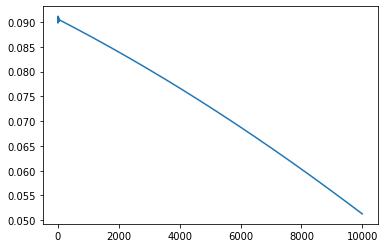

In [100]:
plt.plot(range(iteration), cost)
plt.show()

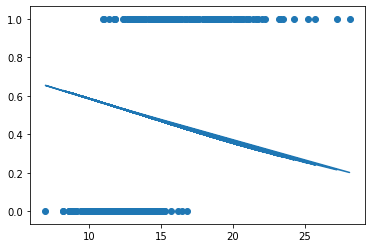

In [111]:
plt.scatter(train_set_x, train_set_y)
plt.plot(train_set_x, ySigmoid)
plt.show()


In [106]:
def accuracy(x, y, m0, m1):
    true_positive = 0
    lin_model = m0 + m1*x
    ySigmoid = 1 / (1 + np.exp(-lin_model))
    yPredict = [0 if el<0.5 else 1 for el in ySigmoid]
    for i in range(len(x)):
        if yPredict[i] == y[i]:
            true_positive += 1
    accuracy = true_positive / len(x)        
    return true_positive, accuracy, yPredict    
              


In [107]:
true, acc, yPredict= accuracy(test_set_x, test_set_y, m0, m1)

In [108]:
true

34

In [109]:
acc

0.19883040935672514

In [110]:
print(test_set_y, yPredict)

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0] [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
